# MNIST digits classification: 3 solutions

**Source (all credits to):** *Coursera: Intro to Deep Learning Course* and *Easy TensorFlow*

<img src="../resources/mnist_sample.png" style="width:30%">

# 1. Import Libraries

In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf # pip install tensorflow 1.2.1
import keras
import keras.backend as K

import matplotlib_utils
from importlib import reload
reload(matplotlib_utils)

print("We're using TensorFlow", tf.__version__)
print("We're using Keras", keras.__version__)

# use TensorFlow v.1
import tensorflow.compat.v1 as tf 
tf.disable_v2_behavior()

We're using TensorFlow 2.4.1
We're using Keras 2.4.3
Instructions for updating:
non-resource variables are not supported in the long term


# 2. Prepare Data

## 2.1. Preprocessing Data

In [29]:
def preprocessing_dataset(flatten=False):
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

    # normalize x
    X_train = X_train.astype(float) / 255.
    X_test = X_test.astype(float) / 255.

    # we reserve the last 10000 training examples for validation
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]

    if flatten:
        X_train = X_train.reshape([X_train.shape[0], -1])
        X_val = X_val.reshape([X_val.shape[0], -1])
        X_test = X_test.reshape([X_test.shape[0], -1])

    return X_train, y_train, X_val, y_val, X_test, y_test

## 2.2. Load Data

In [45]:
X_train, y_train, X_val, y_val, X_test, y_test = preprocessing_dataset()

print('Shapes')
print('---')
print('X_train =', X_train.shape)
print('y_train =', y_train.shape)
print('X_test =', X_test.shape)
print('y_test =', y_test.shape)
print()
print('Shapes for linear model')
print('---')

X_train_flat = X_train.reshape((X_train.shape[0], -1))
print('Flat X_train =', X_train_flat.shape)

X_val_flat = X_val.reshape((X_val.shape[0], -1))
print('Flat X_val =', X_val_flat.shape)
print()
print('Shapes for cross-entropy')
print('---')

y_train_oh = keras.utils.to_categorical(y_train, 10)
y_val_oh = keras.utils.to_categorical(y_val, 10)

print('One-hot-encoded y_train =', y_train_oh.shape)
print('One-hot-encoded y_val =', y_val_oh.shape)

X_test_flat = X_test.reshape((X_test.shape[0], -1))
y_test_oh = keras.utils.to_categorical(y_test, 10)

Shapes
---
X_train = (50000, 28, 28)
y_train = (50000,)
X_test = (10000, 28, 28)
y_test = (10000,)

Shapes for linear model
---
Flat X_train = (50000, 784)
Flat X_val = (10000, 784)

Shapes for cross-entropy
---
One-hot-encoded y_train = (50000, 10)
One-hot-encoded y_val = (10000, 10)


## 2.3. Look at Data

Example of a manuscript digit


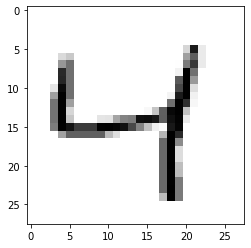

Sample patch of the manuscript digit


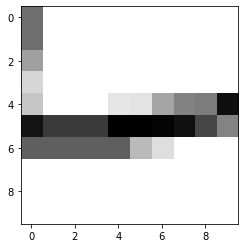

In [4]:
print('Example of a manuscript digit')

plt.imshow(X_train[2], cmap="Greys")
plt.show()

print('Sample patch of the manuscript digit')

plt.imshow(X_train[2, 10:20, 5:15], cmap="Greys")
plt.show()

# 3. Solution 1 - Linear Model (Logistic Regression)

<img src="../resources/linear_classifier.png" style="width:80%">

Training epoch: 1
iter   0:	 Loss=2.24,	Training Accuracy=33.0%
iter 100:	 Loss=0.86,	Training Accuracy=82.0%
iter 200:	 Loss=0.57,	Training Accuracy=85.0%
iter 300:	 Loss=0.62,	Training Accuracy=82.0%
iter 400:	 Loss=0.45,	Training Accuracy=91.0%
---------------------------------------------------------
Epoch: 1, validation loss: 0.43, validation accuracy: 88.7%
---------------------------------------------------------
Training epoch: 2
iter   0:	 Loss=0.40,	Training Accuracy=86.0%
iter 100:	 Loss=0.34,	Training Accuracy=92.0%
iter 200:	 Loss=0.32,	Training Accuracy=93.0%
iter 300:	 Loss=0.45,	Training Accuracy=89.0%
iter 400:	 Loss=0.26,	Training Accuracy=92.0%
---------------------------------------------------------
Epoch: 2, validation loss: 0.37, validation accuracy: 90.1%
---------------------------------------------------------
Training epoch: 3
iter   0:	 Loss=0.36,	Training Accuracy=89.0%
iter 100:	 Loss=0.22,	Training Accuracy=94.0%
iter 200:	 Loss=0.37,	Training Accuracy=90

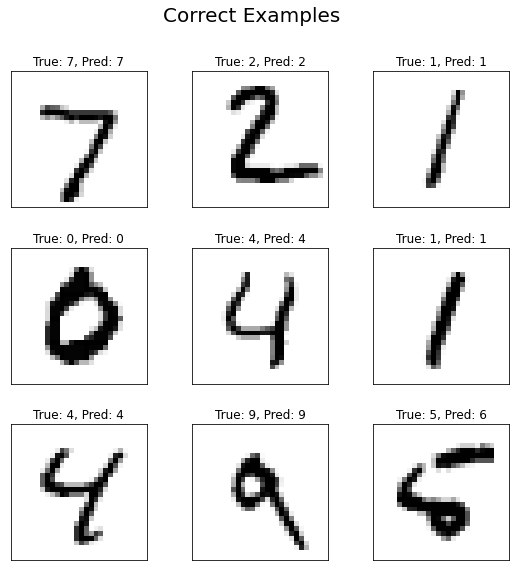

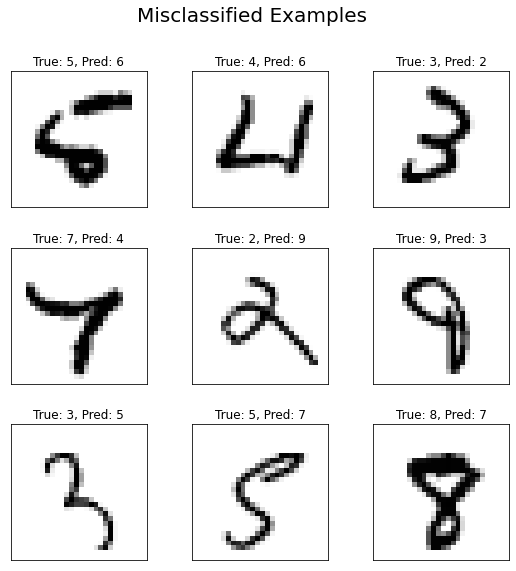

In [64]:
# data dimensions
input_size = len(X_train_flat[1])
n_classes = len(y_train_oh[1])

# clear context
K.clear_session()

# hyper-parameters
EPOCHS = 10
BATCH_SIZE = 100
DISPLAY_FREQ = 100      # frequency of displaying the training results
LEARNING_RATE = 0.001

# model input data
x = tf.placeholder(tf.float32, shape=[None, input_size], name='X')
y = tf.placeholder(tf.float32, shape=[None, n_classes], name='Y')
 
# model parameters: W (weights) and b (bias)
W = weight_variable(shape=[input_size, n_classes])
b = bias_variable(shape=[n_classes])

# calculate logits (forward output)
#output_logits = tf.matmul(x, W) + b
output_logits = x @ W + b

######## prepare model ########

# loss function = softmax with cross-entropy
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=output_logits), name='loss')

# optimizer = Adam
optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE, name='Adam-op').minimize(loss)

# model prediction
correct_prediction = tf.equal(tf.argmax(output_logits, 1), tf.argmax(y, 1), name='correct_pred')

# model accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy')

# model predictions
cls_prediction = tf.argmax(output_logits, axis=1, name='predictions')
 
# initialize tf variables
init = tf.global_variables_initializer()
 
######## train model ########

# create a tf session
sess = tf.InteractiveSession()

# initialize session variables
sess.run(init)

num_tr_iter = int(len(y_train) / BATCH_SIZE) # ~500 iterations

for epoch in range(EPOCHS):
    print('Training epoch: {}'.format(epoch + 1))
    
    # randomly shuffle the training data at the beginning of each epoch 
    x_train, y_train = randomize(X_train_flat, y_train_oh)
    
    for iteration in range(num_tr_iter):
        start = iteration * BATCH_SIZE
        end = (iteration + 1) * BATCH_SIZE
        
        x_batch, y_batch = get_next_batch(x_train, y_train, start, end)

        # run optimization (backprop)
        feed_dict_batch = {x: x_batch, y: y_batch}
        sess.run(optimizer, feed_dict=feed_dict_batch)

        if iteration % DISPLAY_FREQ == 0:
            
            # calculate and display the batch loss and accuracy
            loss_batch, acc_batch = sess.run([loss, accuracy], feed_dict=feed_dict_batch)

            print("iter {0:3d}:\t Loss={1:.2f},\tTraining Accuracy={2:.01%}".
                  format(iteration, loss_batch, acc_batch))

    # run validation after every epoch
    feed_dict_valid = {x: X_val_flat[:1000], y: y_val_oh[:1000]}
    loss_valid, acc_valid = sess.run([loss, accuracy], feed_dict=feed_dict_valid)
    
    print('---------------------------------------------------------')
    print("Epoch: {0}, validation loss: {1:.2f}, validation accuracy: {2:.01%}".
          format(epoch + 1, loss_valid, acc_valid))
    print('---------------------------------------------------------')
    
######## test model ########

feed_dict_test = {x: X_test_flat, y: y_test_oh}
loss_test, acc_test = sess.run([loss, accuracy], feed_dict=feed_dict_test)

print('---------------------------------------------------------')
print("Test loss: {0:.2f}, test accuracy: {1:.01%}".format(loss_test, acc_test))
print('---------------------------------------------------------')

######## plot results ########

# plot some of the correct and misclassified examples
cls_pred = sess.run(cls_prediction, feed_dict=feed_dict_test)
cls_true = np.argmax(y_test_oh, axis=1)

plot_images(X_test_flat, cls_true, cls_pred, title='Correct Examples')
plot_example_errors(X_test_flat, cls_true, cls_pred, title='Misclassified Examples')
plt.show()

sess.close()

# 4. Solution 2 - Multilayer Perceptron (MLP) with 2 Hidden Layers

<img src="../resources/nn.png" style="width:100%">

Training epoch: 1
iter   0:	 Loss=2.28,	Training Accuracy=40.0%
iter 100:	 Loss=0.38,	Training Accuracy=87.0%
iter 200:	 Loss=0.43,	Training Accuracy=86.0%
iter 300:	 Loss=0.20,	Training Accuracy=95.0%
iter 400:	 Loss=0.20,	Training Accuracy=93.0%
---------------------------------------------------------
Epoch: 1, validation loss: 0.30, validation accuracy: 92.4%
---------------------------------------------------------
Training epoch: 2
iter   0:	 Loss=0.18,	Training Accuracy=94.0%
iter 100:	 Loss=0.41,	Training Accuracy=87.0%
iter 200:	 Loss=0.16,	Training Accuracy=95.0%
iter 300:	 Loss=0.19,	Training Accuracy=94.0%
iter 400:	 Loss=0.23,	Training Accuracy=91.0%
---------------------------------------------------------
Epoch: 2, validation loss: 0.22, validation accuracy: 93.9%
---------------------------------------------------------
Training epoch: 3
iter   0:	 Loss=0.11,	Training Accuracy=97.0%
iter 100:	 Loss=0.26,	Training Accuracy=92.0%
iter 200:	 Loss=0.11,	Training Accuracy=94

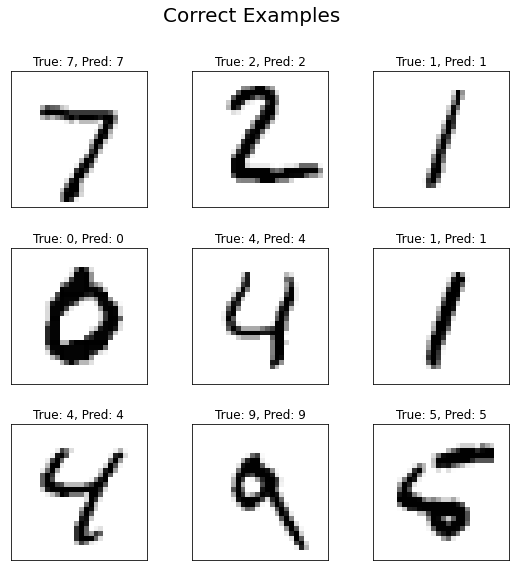

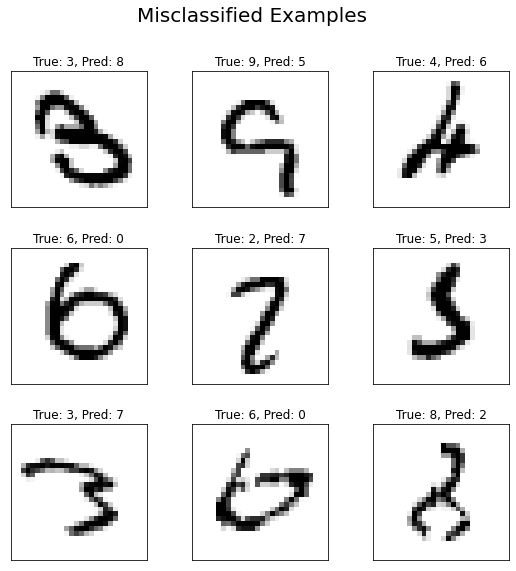

In [92]:
# data dimensions
input_size = len(X_train_flat[1])
n_classes = len(y_train_oh[1])

# clear context
K.clear_session()

# model input data
x = tf.placeholder(tf.float32, shape=[None, input_size], name='X')
y = tf.placeholder(tf.float32, shape=[None, n_classes], name='Y')
 
# model parameters: W (weights) and b (bias)
W = weight_variable(shape=[input_size, n_classes])
b = bias_variable(shape=[n_classes])

# hyper-parameters
EPOCHS = 13
BATCH_SIZE = 100
DISPLAY_FREQ = 100      # frequency of displaying the training results
LEARNING_RATE = 0.001
h1 = 200                # number of neurons in the 1st hidden layey

######## prepare model ########

# create a fully-connected layer with h1 nodes as hidden layer
fc1 = fc_layer(x, h1, 'FC1', use_relu=True)

# create a fully-connected layer with n_classes nodes as output layer
output_logits = fc_layer(fc1, n_classes, 'OUT', use_relu=False)

# loss function = softmax with cross-entropy
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=output_logits), name='loss')

# optimizer = Adam
optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE, name='Adam-op').minimize(loss)

# model prediction
correct_prediction = tf.equal(tf.argmax(output_logits, 1), tf.argmax(y, 1), name='correct_pred')

# model accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy')

# model predictions
cls_prediction = tf.argmax(output_logits, axis=1, name='predictions')
 
# initialize tf variables
init = tf.global_variables_initializer()

# model predictions
cls_prediction = tf.argmax(output_logits, axis=1, name='predictions')
 
# initialize tf variables
init = tf.global_variables_initializer()
 
######## train model ########

# create a tf session
sess = tf.InteractiveSession()

# initialize session variables
sess.run(init)

num_tr_iter = int(len(y_train) / BATCH_SIZE) # ~500 iterations

for epoch in range(EPOCHS):
    print('Training epoch: {}'.format(epoch + 1))
    
    # randomly shuffle the training data at the beginning of each epoch 
    x_train, y_train = randomize(X_train_flat, y_train_oh)
    
    for iteration in range(num_tr_iter):
        start = iteration * BATCH_SIZE
        end = (iteration + 1) * BATCH_SIZE
        
        x_batch, y_batch = get_next_batch(x_train, y_train, start, end)

        # run optimization (backprop)
        feed_dict_batch = {x: x_batch, y: y_batch}
        sess.run(optimizer, feed_dict=feed_dict_batch)

        if iteration % DISPLAY_FREQ == 0:
            
            # calculate and display the batch loss and accuracy
            loss_batch, acc_batch = sess.run([loss, accuracy], feed_dict=feed_dict_batch)

            print("iter {0:3d}:\t Loss={1:.2f},\tTraining Accuracy={2:.01%}".
                  format(iteration, loss_batch, acc_batch))

    # run validation after every epoch
    feed_dict_valid = {x: X_val_flat[:1000], y: y_val_oh[:1000]}
    loss_valid, acc_valid = sess.run([loss, accuracy], feed_dict=feed_dict_valid)
    
    print('---------------------------------------------------------')
    print("Epoch: {0}, validation loss: {1:.2f}, validation accuracy: {2:.01%}".
          format(epoch + 1, loss_valid, acc_valid))
    print('---------------------------------------------------------')
    
######## test model ########

feed_dict_test = {x: X_test_flat, y: y_test_oh}
loss_test, acc_test = sess.run([loss, accuracy], feed_dict=feed_dict_test)

print('---------------------------------------------------------')
print("Test loss: {0:.2f}, test accuracy: {1:.01%}".format(loss_test, acc_test))
print('---------------------------------------------------------')

######## plot results ########

# plot some of the correct and misclassified examples
cls_pred = sess.run(cls_prediction, feed_dict=feed_dict_test)
cls_true = np.argmax(y_test_oh, axis=1)

plot_images(X_test_flat, cls_true, cls_pred, title='Correct Examples')
plot_example_errors(X_test_flat, cls_true, cls_pred, title='Misclassified Examples')
plt.show()

sess.close()

# 5. Solution 3 - Convolutional Neural Network (CNN)

<img src="../resources/cnn.png" style="width:100%">

In [93]:
print('Doing...')

Doing...


# 99. Functions Used

In [72]:
def weight_variable(shape):
    """
    Create a weight variable with appropriate initialization
    :param name: weight name
    :param shape: weight shape
    :return: initialized weight variable
    """
    initer = tf.truncated_normal_initializer(stddev=0.01)
    return tf.get_variable('W',
                           dtype=tf.float32,
                           shape=shape,
                           initializer=initer)

def bias_variable(shape):
    """
    Create a bias variable with appropriate initialization
    :param name: bias variable name
    :param shape: bias variable shape
    :return: initialized bias variable
    """
    initial = tf.constant(0., shape=shape, dtype=tf.float32)
    return tf.get_variable('b',
                           dtype=tf.float32,
                           initializer=initial)

def randomize(x, y):
    """ Randomizes the order of data samples and their corresponding labels"""
    permutation = np.random.permutation(y.shape[0])
    shuffled_x = x[permutation, :]
    shuffled_y = y[permutation]
    return shuffled_x, shuffled_y

def get_next_batch(x, y, start, end):
    x_batch = x[start:end]
    y_batch = y[start:end]
    return x_batch, y_batch

def plot_images(images, cls_true, cls_pred=None, title=None):
    """
    Create figure with 3x3 sub-plots.
    :param images: array of images to be plotted, (9, img_h*img_w)
    :param cls_true: corresponding true labels (9,)
    :param cls_pred: corresponding true labels (9,)
    """
    fig, axes = plt.subplots(3, 3, figsize=(9, 9))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(28, 28), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            ax_title = "True: {0}".format(cls_true[i])
        else:
            ax_title = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_title(ax_title)

        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])

    if title:
        plt.suptitle(title, size=20)
    plt.show(block=False)

def plot_example_errors(images, cls_true, cls_pred, title=None):
    """
    Function for plotting examples of images that have been mis-classified
    :param images: array of all images, (#imgs, img_h*img_w)
    :param cls_true: corresponding true labels, (#imgs,)
    :param cls_pred: corresponding predicted labels, (#imgs,)
    """
    # Negate the boolean array.
    incorrect = np.logical_not(np.equal(cls_pred, cls_true))

    # Get the images from the test-set that have been
    # incorrectly classified.
    incorrect_images = images[incorrect]

    # Get the true and predicted classes for those images.
    cls_pred = cls_pred[incorrect]
    cls_true = cls_true[incorrect]

    # Plot the first 9 images.
    plot_images(images=incorrect_images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9],
                title=title)
    
# weight wrapper for Neural Network (NN)
def weight_variable_NN(name, shape):
    """
    Create a weight variable with appropriate initialization
    :param name: weight name
    :param shape: weight shape
    :return: initialized weight variable
    """
    initer = tf.truncated_normal_initializer(stddev=0.01)
    return tf.get_variable('W_' + name,
                           dtype=tf.float32,
                           shape=shape,
                           initializer=initer)

# bias wrapper for Neural Network (NN)
def bias_variable_NN(name, shape):
    """
    Create a bias variable with appropriate initialization
    :param name: bias variable name
    :param shape: bias variable shape
    :return: initialized bias variable
    """
    initial = tf.constant(0., shape=shape, dtype=tf.float32)
    return tf.get_variable('b_' + name,
                           dtype=tf.float32,
                           initializer=initial)

def fc_layer(x, num_units, name, use_relu=True):
    """
    Create a fully-connected layer
    :param x: input from previous layer
    :param num_units: number of hidden units in the fully-connected layer
    :param name: layer name
    :param use_relu: boolean to add ReLU non-linearity (or not)
    :return: The output array
    """
    in_dim = x.get_shape()[1]
    W = weight_variable_NN(name, shape=[in_dim, num_units])
    b = bias_variable_NN(name, [num_units])
    layer = tf.matmul(x, W)
    layer += b
    if use_relu:
        layer = tf.nn.relu(layer)
    return layer